In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [16]:
import idx2numpy

x_train = idx2numpy.convert_from_file('1/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('1/train-labels.idx1-ubyte')

x_test = idx2numpy.convert_from_file('1/t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('1/t10k-labels.idx1-ubyte')

In [17]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [18]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7391 - loss: 1.0126 - val_accuracy: 0.9042 - val_loss: 0.3491
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9062 - loss: 0.3441 - val_accuracy: 0.9193 - val_loss: 0.2857
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9202 - loss: 0.2843 - val_accuracy: 0.9305 - val_loss: 0.2519
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9289 - loss: 0.2536 - val_accuracy: 0.9360 - val_loss: 0.2294
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9357 - loss: 0.2297 - val_accuracy: 0.9400 - val_loss: 0.2099
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9407 - loss: 0.2105 - val_accuracy: 0.9444 - val_loss: 0.1972
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9462 - loss: 0.1937 - val_accuracy: 0.9476 - val_loss: 0.1844
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9497 - loss: 0.1832 -

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9504 - loss: 0.1780
Test Loss: 0.15255452692508698
Test Accuracy: 0.9563000202178955


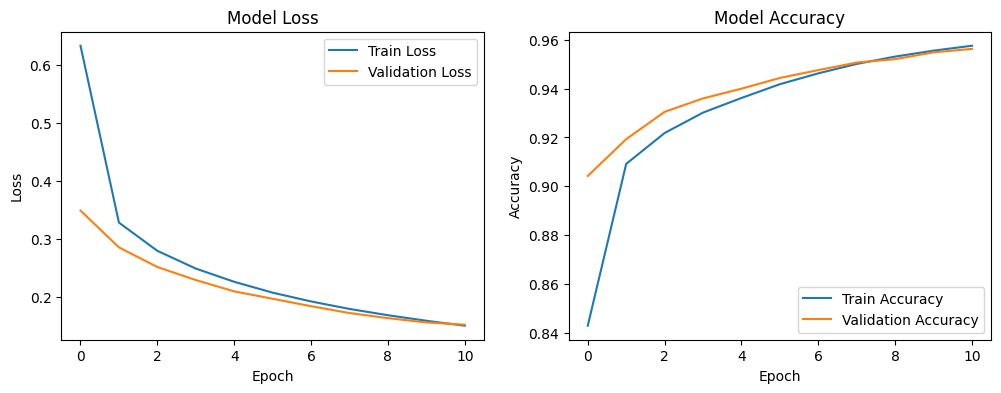

In [23]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()